In [1]:
# 라이브러리 불러오기
import seaborn as sns

# titanic 데이터셋 가져오기
df = sns.load_dataset('titanic')

# age 열의 첫 10개 데이터 출력 (5 행에 NaN 값)
df['age'].head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: age, dtype: float64

In [ ]:
# # age 열의 NaN값을 다른 나이 데이터의 평균으로 변경하기
# mean_age = df['age'].mean(axis=0)   # age 열의 평균 계산 (NaN 값 제외)
# df['age'] = df['age'].fillna(mean_age)

# # age 열의 첫 10개 데이터 출력 (5 행에 NaN 값이 평균으로 대체)
# df['age'].head(10)

<Axes: >

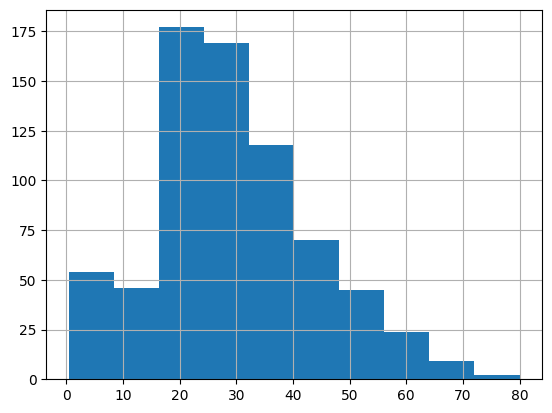

In [2]:
# 나이에 대한 histogram
df['age'].hist()

In [ ]:
# age 열의 NaN값을 중위수(median)로 변경하기
median_age = df['age'].median(axis=0)   # age 열의 평균 계산 (NaN 값 제외)
df['age'] = df['age'].fillna(median_age)
df['age'].head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5    28.0
6    54.0
7     2.0
8    27.0
9    14.0
Name: age, dtype: float64

In [6]:
df = sns.load_dataset('titanic')
df[df.age.isna()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
17,1,2,male,NaN,0,0,13.0000,S,Second,man,True,NaN,Southampton,yes,True
19,1,3,female,NaN,0,0,7.2250,C,Third,woman,False,NaN,Cherbourg,yes,True
26,0,3,male,NaN,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True
28,1,3,female,NaN,0,0,7.8792,Q,Third,woman,False,NaN,Queenstown,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,no,True
863,0,3,female,NaN,8,2,69.5500,S,Third,woman,False,NaN,Southampton,no,False
868,0,3,male,NaN,0,0,9.5000,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
#객실별 성별에 따른 평균값으로 해당 결측치를 대체
df.groupby(['pclass','sex'])['age'].mean()  #객실별, 성별 에 따른 나이의 평균값

pclass  sex   
1       female    34.611765
        male      41.281386
2       female    28.722973
        male      30.740707
3       female    21.750000
        male      26.507589
Name: age, dtype: float64

In [ ]:
#transform : 객실별, 성별 에 따른 결측치를 mean으로 대체 해줌 
df['age']=df.groupby(['pclass','sex'])['age'].transform('mean')   
df.age.head(10)

0    26.507589
1    34.611765
2    21.750000
3    34.611765
4    26.507589
5    26.507589
6    41.281386
7    26.507589
8    21.750000
9    28.722973
Name: age, dtype: float64

In [ ]:
# 평균 vs 중위수 .. 어떤기준으로 선택
# 평균
    # 이상치의 비중이 낮을 때
# 중위수
    # 이상치의 비중이 높을 때

# 결측치가 많을 때 (50% 이상)
    #머신러닝/딥러닝 기반의 보간 고려.

{'whiskers': [<matplotlib.lines.Line2D at 0x1b1f694e850>,
 'caps': [<matplotlib.lines.Line2D at 0x1b1f694ead0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b1f694e710>],
 'medians': [<matplotlib.lines.Line2D at 0x1b1f694ed50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b1f694ee90>],
 'means': []}

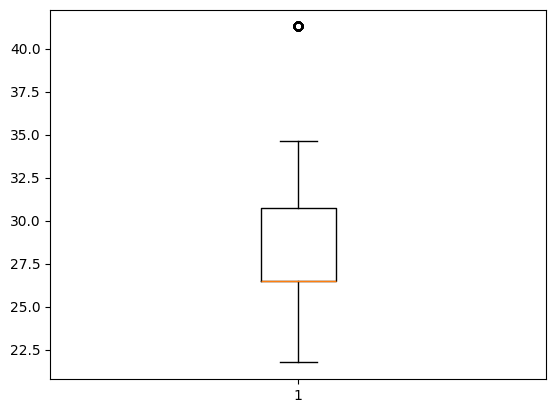

In [10]:
import matplotlib.pyplot as plt
plt.boxplot(df['age'])

<Axes: >

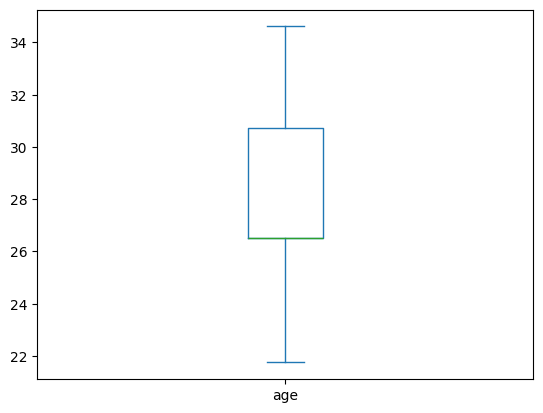

In [25]:
#이상치 찾고 제거하는 방법????????????????????????????????????????
q1=df['age'].quantile(0.25)   #25% 구간
q3=df['age'].quantile(0.75)   #75% 구간
iqr = q3-q1
lower = q1-iqr*1.5
upper = q3+iqr*1.5
outlier_mask = (df['age'] >= lower) & (df['age'] <= upper)
df[outlier_mask]
df[outlier_mask]['age'].plot(kind='box')

In [ ]:
# 델타 = 상대적 평균 - 중앙값의 차이
# rel_diff = abs(mean-median) / abs(median) + 1e-8
# 평균이 중앙값에서 얼마나 떨어져 있는지를 상대적으로 본 값이 크면 분포가 치우쳐져 있거나 또는 outlier(이상치)가 평균을 끌어당긴다

# 세타 = 이상치 비율(IQR기준)
# IQR = Q3 - Q1 / 이상치 = (Q1 - IQR*1.5) - (Q3+IQR*1.5) (보수적일때는 1.7~2까지도 곱함.)
# 관측치 중 IQR 기준으로 이상치에 해당하는 값이 차지하는 비율이 크면 평균이 불안정
# oulier_frac 이상치 비율 ; 이상치 개수 / 데이터 개수
# oulier_frac = ((df['age'] < lower) | (df['age'] <= upper)).sum()


# rel_diff < 델타 and outlier_frac < 세타 :
    # mean
#else
    # median

# 델타와 세타 에 해당하는 값은
# 보수적 (이상치에 민감)  
    # 델타 0.05(5%) / 세타 0.01(1%)
# 보통(추천) 델타
    # 델타 0.08~0.10 / 세타: 0.02~0.03
# 관대 (어느정도 편차는 허용)
    # 델타 0.15 / 세타 0.05

In [ ]:
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic = titanic.dropna(subset=['age'])   
#▲ titanic.dropna() 전체하게되면 nan이 있는 행을 다 날림(nan이 80% 잇던 컬럼있었음)... 이상치로 되어 있는 행이 같이 날라갈 수 있으므로 하지말것.. 

mean = titanic.age.mean()
median = titanic.age.median()

# 상대 차이
rel_diff = abs(mean-median) / abs(median)+1e-8

# 이상치 비율 계산 : 이상치 계산 / 전체개수
q1 = titanic.age.quantile(0.25)
q3 = titanic.age.quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5*iqr
upper = q3 + 1.5*iqr
((titanic.age < lower) | (titanic.age > upper)).sum()
outlier_frac = ((titanic.age < lower) | (titanic.age > upper)).mean()


delta, setha = 0.08, 0.02
if rel_diff < delta and outlier_frac < setha:
    print('mean')
else:
    print('median')

mean
